<a href="https://colab.research.google.com/github/eduardocarbo/Biography/blob/main/Step_by_Step_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

base on: https://www.sensiocoders.com/blog/100_ml_e2e

The idea with this notebook is to put Machine Learning ML concepts into practice, and learn some new tricks along the way, with the execution of an ML project from start to finish so you can use it as stepping stones for your projects. (by: ECB 2023)

When carrying out an ML project, these are the most important points to keep in mind:

  (1).- Understand the problem from a global vision (not only technical, but business and impact).

  (2) - Get the data.

  (3) - Explore and visualize the data.

  (4) - Prepare the data for ML algorithms.

  (5) - Select a model and train it.

  (6) - Adjust your model (hyperparameter optimization, ensemble).

  (7) - Present your solution.

  (8) Deploy, monitor and maintain the system.

  (9).- Obviously, feel free to modify this list to suit your needs.






#The big picture:
When it comes to understanding an ML problem as a whole, these are some of the questions you should ask yourself:

What are the business objectives?

How will my solution be used (offline, API, application, ...)?

Are there similar solutions or solutions that can be used to achieve the objectives?

How should I approach the problem (supervised/unsupervised learning, ...)?

How will I measure performance (test data, metrics, ...)?

Are the metrics aligned with the business objectives?

What is the minimum acceptable performance value to achieve the business objectives?

Is there the expertise to carry out the project (internal team, outsourcing, ...)?

How could the problem be solved manually (not automated, not ML)?

The example we are going to develop in this post will consist of training a ML model for house price prediction. Answering several of the previous questions, the objective will be to develop a decision support system for real estate investment. The solution will be used through API and web application. We will use a public dataset with which we will solve a regression task in a supervised manner. The metric used will be the squared medical error evaluated on a set of test data extracted from the original dataset.



In [1]:
import requests
import tarfile

URL = "https://mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud/housing.tgz"
PATH = "housing.tgz"

def getData(url=URL, path=PATH):
  r = requests.get(url)
  with open(path, 'wb') as f:
    f.write(r.content)
  housing_tgz = tarfile.open(path)
  housing_tgz.extractall()
  housing_tgz.close()

In [2]:
getData()

In [3]:
import pandas as pd

PATH = "housing.csv"

def loadData(path=PATH):
  return pd.read_csv(path)

In [4]:
data = loadData()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17750,-121.84,37.33,28.0,1535.0,330.0,1937.0,317.0,4.1146,160100.0,<1H OCEAN
1836,-122.30,37.90,41.0,2053.0,435.0,873.0,415.0,3.4091,223000.0,NEAR BAY
10222,-117.89,33.88,33.0,1582.0,256.0,771.0,240.0,5.3836,229600.0,<1H OCEAN
15343,-117.35,33.23,4.0,1837.0,287.0,934.0,277.0,3.8958,189800.0,NEAR OCEAN
2034,-119.75,36.73,39.0,2290.0,539.0,1685.0,536.0,1.6325,52100.0,INLAND
8109,-118.19,33.79,29.0,3497.0,1096.0,2994.0,919.0,1.8109,137500.0,NEAR OCEAN
12614,-121.51,38.49,21.0,4426.0,790.0,1856.0,761.0,4.1000,158300.0,INLAND
17826,-121.89,37.38,3.0,4778.0,1047.0,2522.0,990.0,5.7695,271400.0,<1H OCEAN
4832,-118.29,34.04,44.0,1941.0,579.0,2049.0,535.0,2.0405,143000.0,<1H OCEAN
18149,-122.03,37.34,17.0,1165.0,278.0,598.0,287.0,4.0129,342400.0,<1H OCEAN


Our dataset occupies about 1.6MB of memory, so we can store it without problems in our machine. In addition, it contains geographic type information (latitude and longitude) with 8 numeric type features and 1 categorical type feature. Now, we will generate a test sample that we will only use at the end of it all to evaluate our model.

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=22)

train.to_csv('housing_train.csv', index=False)
test.to_csv('housing_test.csv', index=False)

#Explore and Visualize the data
The next step in this "recipe" of developing an ML project is to explore and visualize the data. To do this you can follow these steps:

a.- Create a copy of the dataset to explore it (use a small sample if necessary).

b.- Create a notebook for data exploration (known as EDA, or exploratory data analysis).

c.- Analyze each attribute and its characteristics: name, type (categorical or numerical), number of missing values, noise in the data, usability for the task at hand, ...

d.- For supervised learning tasks, identify the target feature, the target or ground truth.

e.- Visualize the data.

f.- Study correlations between features.

g.- Think about how you would solve the problem manually (without using ML).

h.- Identify possible transformations that you can apply to the data to obtain better results.

i.- Investigate if there are additional data you can use (and go back to the previous point).

j.- Document all your findings and what you learn.

k.- If you have the possibility, contact an expert in the field to help and advise you during this process.

Returning to our example, let's explore and visualize the data.

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

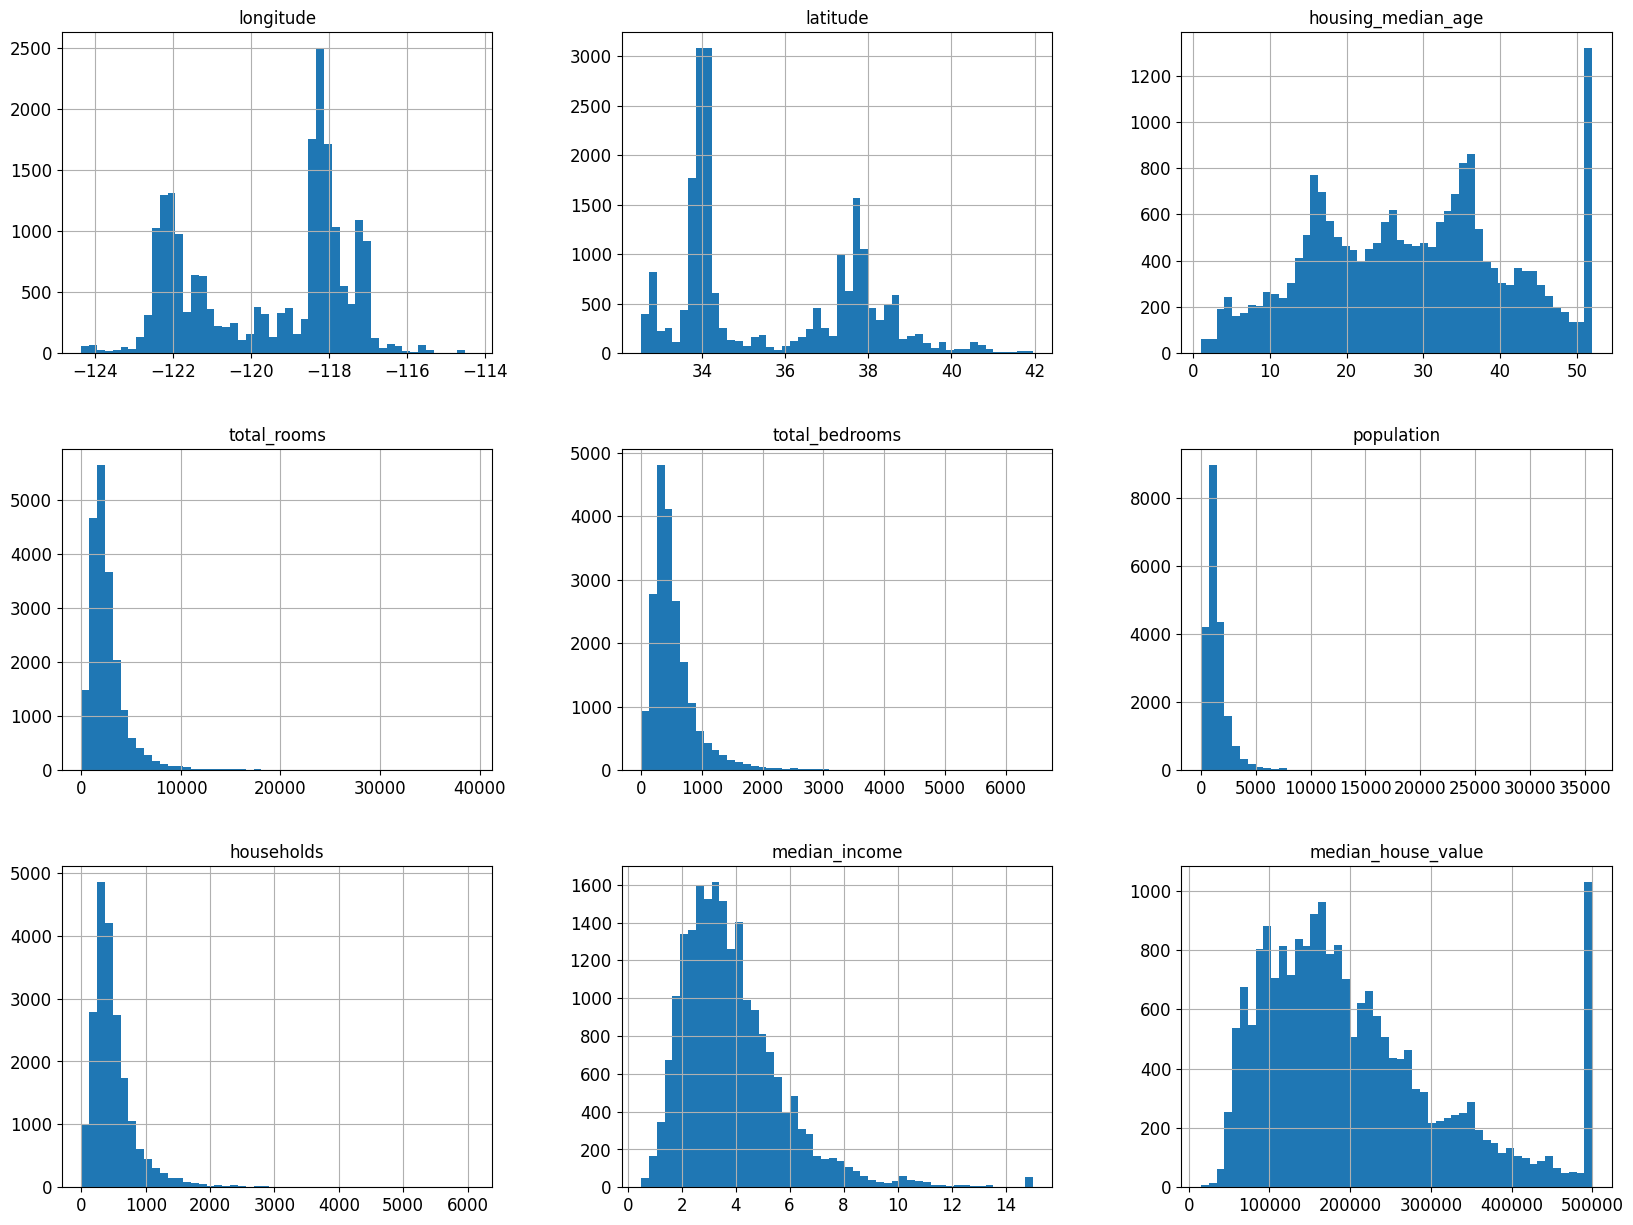

In [13]:
data.hist(bins=50, figsize=(20,15))
plt.show()

The following image shows a very informative visualization for our particular problem. Here we see all the attributes of the dataset using the geographic information on the x-y axes as points whose size depends on the population and the color represents the average value of a house (our target variable).

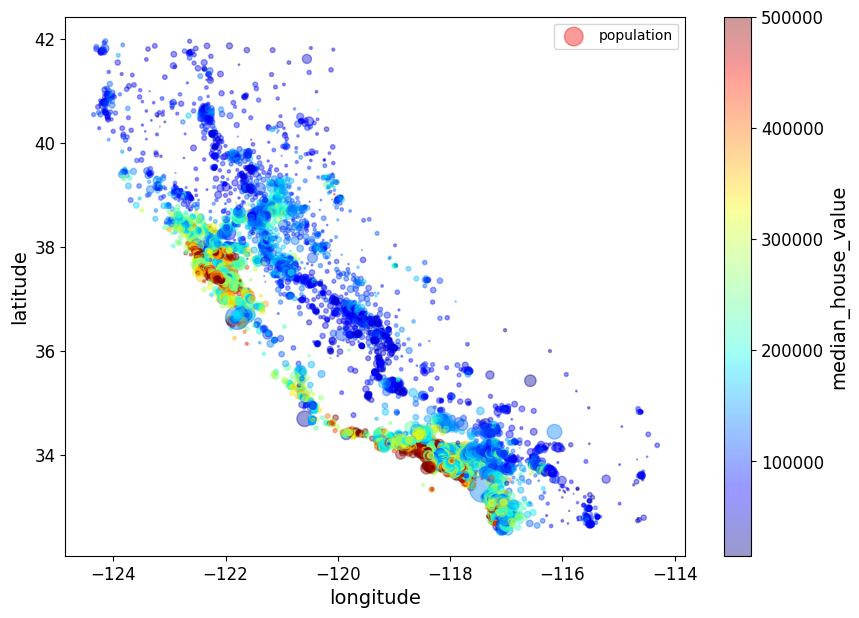

In [15]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

Depending on your data, always try to find those visualizations that provide as much information as possible. In our case, we see that the most expensive houses are located near the coast, and the cheapest houses are located inland (the data is from California).

Now we are going to look for correlations between the different attributes.

In [16]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-16-ebf3c9d18328>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

As we can see, the variable most correlated with the value of a house is the average income of the population, while aspects such as the number of rooms or the population of the area are not so important.

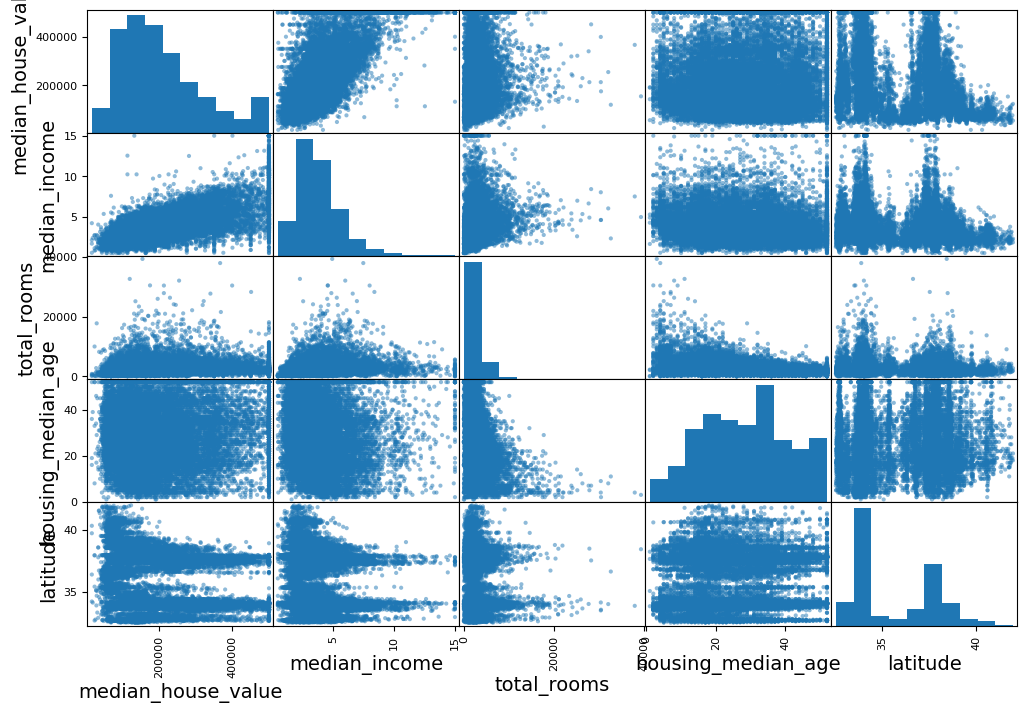

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age", "latitude"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

#Prepare the data
Once you have familiarized yourself with the data and discovered interesting things, you should prepare it so that the ML algorithms are able to use it for training. To do this:

a.- Work with copies of the dataset, leave the original intact.

b.- Implement functions for all the transformations you apply, this way you will be able to apply them to new data or in future projects.

c.- Clean the data by removing outliers and filling in (or removing) missing values.

d.- Choose the attributes you want to work with and eliminate the rest.

e.- Feature Engineering: separates the characteristics into numerical and categorical, processes the necessary data (text, dates, ...), adds new characteristics, ...

f.- Normalize the data.

Let's start by separating the features to train and the target.

In [18]:
data = pd.read_csv('housing_train.csv')
data, labels = data.drop(['median_house_value'], axis=1), data['median_house_value'].copy()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-119.72,36.76,23.0,6403.0,NaN,3573.0,1260.0,2.3006,INLAND
1,-120.79,38.70,13.0,5036.0,1034.0,2243.0,923.0,2.3319,INLAND
2,-118.20,34.04,18.0,796.0,227.0,547.0,218.0,1.0333,<1H OCEAN
3,-117.34,33.21,12.0,5963.0,1372.0,3015.0,1124.0,2.7386,NEAR OCEAN
4,-121.46,38.54,48.0,1001.0,205.0,605.0,175.0,1.8333,INLAND


In [19]:
labels.head()

0     69000.0
1    138500.0
2    135400.0
3    216100.0
4     58200.0
Name: median_house_value, dtype: float64

Moreover, since we will have to treat numerical and categorical variables differently, we will also separate them.

In [20]:
data_num = data.drop(['ocean_proximity'], axis=1)
data_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.72,36.76,23.0,6403.0,NaN,3573.0,1260.0,2.3006
1,-120.79,38.70,13.0,5036.0,1034.0,2243.0,923.0,2.3319
2,-118.20,34.04,18.0,796.0,227.0,547.0,218.0,1.0333
3,-117.34,33.21,12.0,5963.0,1372.0,3015.0,1124.0,2.7386
4,-121.46,38.54,48.0,1001.0,205.0,605.0,175.0,1.8333


In [21]:
data_cat = data[['ocean_proximity']]
data_cat.head()

,ocean_proximity
0,INLAND
1,INLAND
2,<1H OCEAN
3,NEAR OCEAN
4,INLAND


As we have seen in the first point, our dataset contains missing values in the total_bedrooms attribute. If we want to use this feature for training, we will have to deal with this.

In [23]:
data_num.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        163
population              0
households              0
median_income           0
dtype: int64

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(data_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2126.    ,  435.    , 1165.    ,
        410.    ,    3.5334])

In [25]:
X = imputer.transform(data_num)
data_tr = pd.DataFrame(X, columns=data_num.columns, index=data.index)
data_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

Once the missing values have been treated, we can continue to treat the categorical data since ML models are only able to work with numerical data. In this case, we will do a one-hot encoding.

In [26]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

Además, vamos a añadir un par de caracterísitcas nuevas que son prometedoras. Para ello podemos crear nuestro propia transformación de Scikit-Learn.

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [28]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
data_extra_attribs = attr_adder.transform(data.values)
data_extra_attribs.shape # 9 + 2

(16512, 11)

The next step is to normalize the numerical data, for which we can use a StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)
data_tr = pd.DataFrame(data_scaled, columns=data_num.columns, index=data.index)
data_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.634900e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,7.217525e-16,6.491362e-16,1.207583e-16,2.216143e-17,-2.933613e-18,7.627404e-17,4.028862e-17,-6.981926e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.381604e+00,-1.445235e+00,-2.201136e+00,-1.214416e+00,-1.278351e+00,-1.256377e+00,-1.310671e+00,-1.764526e+00
25%,-1.105456e+00,-7.998537e-01,-8.491991e-01,-5.457575e-01,-5.776820e-01,-5.636872e-01,-5.758077e-01,-6.848289e-01
50%,5.324548e-01,-6.455233e-01,2.558386e-02,-2.329159e-01,-2.440301e-01,-2.270859e-01,-2.333984e-01,-1.765975e-01
75%,7.819462e-01,9.679302e-01,6.617896e-01,2.338048e-01,2.564478e-01,2.609859e-01,2.723138e-01,4.571083e-01
max,2.628182e+00,2.950841e+00,1.854675e+00,1.631534e+01,1.407917e+01,3.034782e+01,1.470618e+01,5.825810e+00


The next step is to normalize the numerical data, for which we can use a StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)
data_tr = pd.DataFrame(data_scaled, columns=data_num.columns, index=data.index)
data_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.634900e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,7.217525e-16,6.491362e-16,1.207583e-16,2.216143e-17,-2.933613e-18,7.627404e-17,4.028862e-17,-6.981926e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.381604e+00,-1.445235e+00,-2.201136e+00,-1.214416e+00,-1.278351e+00,-1.256377e+00,-1.310671e+00,-1.764526e+00
25%,-1.105456e+00,-7.998537e-01,-8.491991e-01,-5.457575e-01,-5.776820e-01,-5.636872e-01,-5.758077e-01,-6.848289e-01
50%,5.324548e-01,-6.455233e-01,2.558386e-02,-2.329159e-01,-2.440301e-01,-2.270859e-01,-2.333984e-01,-1.765975e-01
75%,7.819462e-01,9.679302e-01,6.617896e-01,2.338048e-01,2.564478e-01,2.609859e-01,2.723138e-01,4.571083e-01
max,2.628182e+00,2.950841e+00,1.854675e+00,1.631534e+01,1.407917e+01,3.034782e+01,1.470618e+01,5.825810e+00


Although we can apply all the processing steps one by one, it is best to put it all together in a Pipeline that is able to accept the data as it comes from reading the csv and leave it ready to be used by the model (applying all the previous transformations).

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)
data_prepared.shape # 8 numericas + 3 adicionales + 5 categoricas one hot encoded

(16512, 16)

#Select and train a model
Once we have the data ready, we can train an ML model. To do so, I recommend you to follow the following tips:

a.- Try many fast models of different types (linear, SVM, random forest, ...) using the default hyperparameters.

b.- Compare the metrics between models (using cross validation if possible).

c.- Analyze the errors of the different models.

d.- Iterate the process with different combinations of features and feature engineering.

e.- Select the most promising models (3-5), preferably if they make different errors, for the next step.

In this step you can use a small subset of your training data to do a lot of quick tests.

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, labels)

LinearRegression()

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, data_prepared, labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [35]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [66437.86587554 67017.05947527 68432.15315087 72976.84720006
 71744.30539608 68479.63555331 69612.83771288 69513.25260389
 70670.12226447 66708.70099048]
Mean: 69159.27802228526
Standard deviation: 2070.289890342265


In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, labels)


DecisionTreeRegressor(random_state=42)

In [38]:
scores = cross_val_score(tree_reg, data_prepared, labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [68703.4303478  72987.81742712 71233.51615824 70066.66438864
 72373.81760126 68460.05433753 70375.70934853 70646.82923159
 72878.96434678 72629.31645032]
Mean: 71035.61196378153
Standard deviation: 1586.7249169822012


In [39]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(data_prepared, labels)
forest_scores = cross_val_score(forest_reg, data_prepared, labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [45637.58713947 49631.22910104 50519.55905349 50609.95649911
 51309.02977016 50889.62631257 51532.353351   52301.92975819
 51709.06028876 48820.41504381]
Mean: 50296.074631759584
Standard deviation: 1827.4658318410761


Feel free to try as many models as you want, with different combinations of attributes and hyperparameters.

#Adjust your model
Once you have tried several models you can get an idea of which one might work best for your type of data. Now, using all available data, you can continue with hyperparameter optimization (using cross validation if possible). If you can afford it, you can test ensemble models to get extra performance by combining your best models.

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)
grid_search.fit(data_prepared, labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [42]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63665.78629364774 {'max_features': 2, 'n_estimators': 3}
55306.96792983332 {'max_features': 2, 'n_estimators': 10}
52600.84680610766 {'max_features': 2, 'n_estimators': 30}
59101.51992683164 {'max_features': 4, 'n_estimators': 3}
52169.30264246198 {'max_features': 4, 'n_estimators': 10}
50129.76430891404 {'max_features': 4, 'n_estimators': 30}
59183.79980031041 {'max_features': 6, 'n_estimators': 3}
51895.62634200346 {'max_features': 6, 'n_estimators': 10}
50123.53914377234 {'max_features': 6, 'n_estimators': 30}
58509.63670843865 {'max_features': 8, 'n_estimators': 3}
52133.699413921495 {'max_features': 8, 'n_estimators': 10}
49993.671954016354 {'max_features': 8, 'n_estimators': 30}
62965.42237911761 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54490.029467187705 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58989.283381114365 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52452.74210883823 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [43]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3748293536048452, 'median_income'),
 (0.16387371587886645, 'INLAND'),
 (0.10502386905150324, 'pop_per_hhold'),
 (0.07093785404419045, 'longitude'),
 (0.06713446676533484, 'latitude'),
 (0.058129764559647905, 'rooms_per_hhold'),
 (0.04685501974832576, 'bedrooms_per_room'),
 (0.04163049058980691, 'housing_median_age'),
 (0.015354399111288572, 'population'),
 (0.01535234077318702, 'total_rooms'),
 (0.014657457859978879, 'total_bedrooms'),
 (0.014002265515751544, 'households'),
 (0.006015230402696976, '<1H OCEAN'),
 (0.003902856515528313, 'NEAR OCEAN'),
 (0.0021768791153720856, 'NEAR BAY'),
 (0.00012403646367597327, 'ISLAND')]

Finally, remember to evaluate your best model on the test data to get the final ms.

In [44]:
from sklearn.metrics import mean_squared_error

test_data = pd.read_csv('housing_test.csv')

final_model = grid_search.best_estimator_

X_test = test_data.drop("median_house_value", axis=1)
y_test = test_data["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

48230.8525852065

In [45]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46125.79814736, 50247.79624482])

#Present your solution
You have already trained a good model with your data, however the work is not yet finished. To present your solution, you must:

(a).-Document all the work you have carried out.

(b).-Create a presentation with eye-catching and informative visualizations that reflect the big picture and convey the main conclusions.

(c).-Explain your solution and why you have achieved the business objective.

(d).-Describe what you learned in the process, what worked and what didn't, what assumptions you made, and the limitations of the system.

(e).-Use easy-to-remember phrases to communicate the results of your work (e.g., the number one indicator for predicting the price of a house is the median income of the area).

(f).-Is your solution better than the current baseline?

#Deploy, monitor, and maintain the system.

Save your models in order to deploy them in the chosen production environment (web server, mobile application, ...). Once up and running, you should monitor the system to make sure that everything is working as expected. If your application allows it, collect new data from the production environment from the actual usage, annotate it (if your task is monitored) and add it to your dataset (in new versions) to re-train the model periodically. In addition, you should monitor aspects such as data drift to prevent your model from degrading and to be able to revert to previous models if something breaks. If you are more interested in these aspects I recommend the series of posts about MLOps in my blog.

In [46]:
import joblib

joblib.dump(final_model, "my_model.pkl")
joblib.dump(full_pipeline, "my_pipeline.pkl")

['my_pipeline.pkl']

In [47]:
model = joblib.load("my_model.pkl")
pipeline = joblib.load("my_pipeline.pkl")

In [48]:
data_test = sample = pd.read_csv("housing_test.csv")

In [49]:
sample = data_test.sample(3)
sample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2938,-121.60,39.15,19.0,1396.0,336.0,940.0,309.0,1.5208,70300.0,INLAND
3295,-117.21,32.87,12.0,1428.0,303.0,528.0,269.0,4.1429,254400.0,NEAR OCEAN
2994,-118.05,33.81,26.0,2523.0,437.0,1377.0,450.0,5.2542,234600.0,<1H OCEAN


from matplotlib import pyplot as plt
sample['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sample['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sample['housing_median_age'].plot(kind='hist', bins=20, title='housing_median_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sample['total_rooms'].plot(kind='hist', bins=20, title='total_rooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
sample.groupby('ocean_proximity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sample.plot(kind='scatter', x='longitude', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sample.plot(kind='scatter', x='latitude', y='housing_median_age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sample.plot(kind='scatter', x='housing_median_age', y='total_rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sample.plot(kind='scatter', x='total_rooms', y='total_bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['total_rooms']
  ys = series['longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sample.sort_values('total_rooms', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ocean_proximity')):
  _plot_series(series, series_name, i)
  fig.legend(title='ocean_proximity', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_rooms')
_ = plt.ylabel('longitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['total_rooms']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sample.sort_values('total_rooms', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ocean_proximity')):
  _plot_series(series, series_name, i)
  fig.legend(title='ocean_proximity', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_rooms')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['total_rooms']
  ys = series['housing_median_age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sample.sort_values('total_rooms', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ocean_proximity')):
  _plot_series(series, series_name, i)
  fig.legend(title='ocean_proximity', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_rooms')
_ = plt.ylabel('housing_median_age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['total_rooms']
  ys = series['total_bedrooms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sample.sort_values('total_rooms', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ocean_proximity')):
  _plot_series(series, series_name, i)
  fig.legend(title='ocean_proximity', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_rooms')
_ = plt.ylabel('total_bedrooms')

from matplotlib import pyplot as plt
sample['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sample['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sample['housing_median_age'].plot(kind='line', figsize=(8, 4), title='housing_median_age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sample['total_rooms'].plot(kind='line', figsize=(8, 4), title='total_rooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(sample['ocean_proximity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(sample, x='longitude', y='ocean_proximity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(sample['ocean_proximity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(sample, x='latitude', y='ocean_proximity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(sample['ocean_proximity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(sample, x='housing_median_age', y='ocean_proximity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(sample['ocean_proximity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(sample, x='total_rooms', y='ocean_proximity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [50]:
X_test_prepared = pipeline.transform(sample)
final_predictions = model.predict(X_test_prepared)
final_predictions

array([ 66570.        , 211153.33333333, 225996.66666667])